In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [4]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [5]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [6]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = {
    "Logistic_L1": LogisticRegression(penalty="l1", solver="liblinear"),
    "Logistic_L2": LogisticRegression(penalty="l2", solver="liblinear"),
    "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=5000),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier()
}

In [9]:
print("Classification Results:")
for name, model in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))

Classification Results:

Logistic_L1
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Logistic_L2
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


ElasticNet
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg

In [10]:
param_grid = {
    "clf__n_estimators": [50, 100],
    "clf__max_depth": [5, 10, None]
}
pipe_rf = Pipeline([("pre", preprocessor), ("clf", RandomForestClassifier())])
grid = GridSearchCV(pipe_rf, param_grid, cv=5, scoring="f1")
grid.fit(X_train, y_train)
print("\nBest RandomForest Params:", grid.best_params_)
print(classification_report(y_test, grid.predict(X_test)))


Best RandomForest Params: {'clf__max_depth': 5, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [11]:
param_dist = {
    "clf__C": np.logspace(-3, 2, 6),
    "clf__kernel": ["linear", "rbf", "poly"],
    "clf__gamma": ["scale", "auto"]
}
pipe_svm = Pipeline([("pre", preprocessor), ("clf", SVC())])
rand = RandomizedSearchCV(pipe_svm, param_dist, cv=5, scoring="f1", n_iter=10, random_state=42)
rand.fit(X_train, y_train)
print("\nBest SVM Params:", rand.best_params_)
print(classification_report(y_test, rand.predict(X_test)))


Best SVM Params: {'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__C': np.float64(0.1)}
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [12]:
print("\nClustering:")

X_cluster = preprocessor.fit_transform(X)


Clustering:


In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_cluster)
print("KMeans clustering completed.")

KMeans clustering completed.


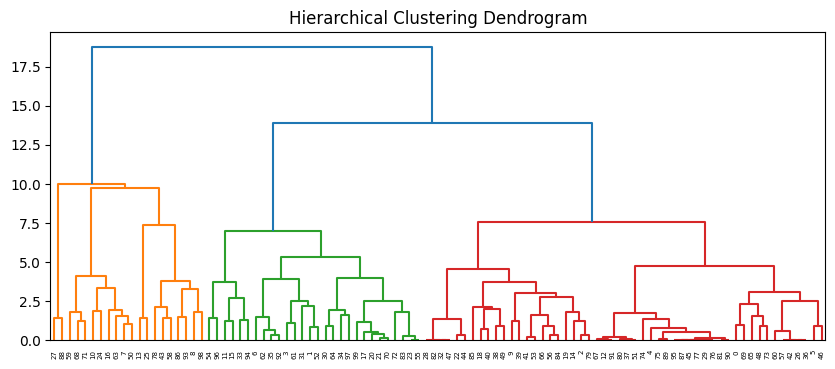

In [14]:
linkage_matrix = linkage(X_cluster[:100], method='ward')
plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [15]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_cluster)
print("DBSCAN clustering completed.")

DBSCAN clustering completed.


In [16]:
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_cluster)
print("Gaussian Mixture Model clustering completed.")

Gaussian Mixture Model clustering completed.
